# Practical 5: SVM Classification

### Dataset : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

## Objectives

- Perform credit card fraud detection using SVC (Linear) & compare with other classification algorithms.
- Perform hyperparameter tuning for C & gamma parameters


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("/kaggle/input/credit-card-default-dataset/credit_card_default.csv", header = 1)


# First few rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Basic Data Analysis

In [ ]:
# Last few rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# Shape of the dataset
df.shape

(30000, 25)

This is an average-sized dataset with 30000 rows and 25 columns

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

All the features are numerical

In [ ]:
# Statistical summary
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Checking for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The dataset has no null values, which is a good quality

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

The dataset does not even have null values

## EDA

### Univariate Analysis

In [ ]:
# Plot Config
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

num_cols = 5
num_rows = int(np.ceil((len(numerical_cols)) / num_cols))

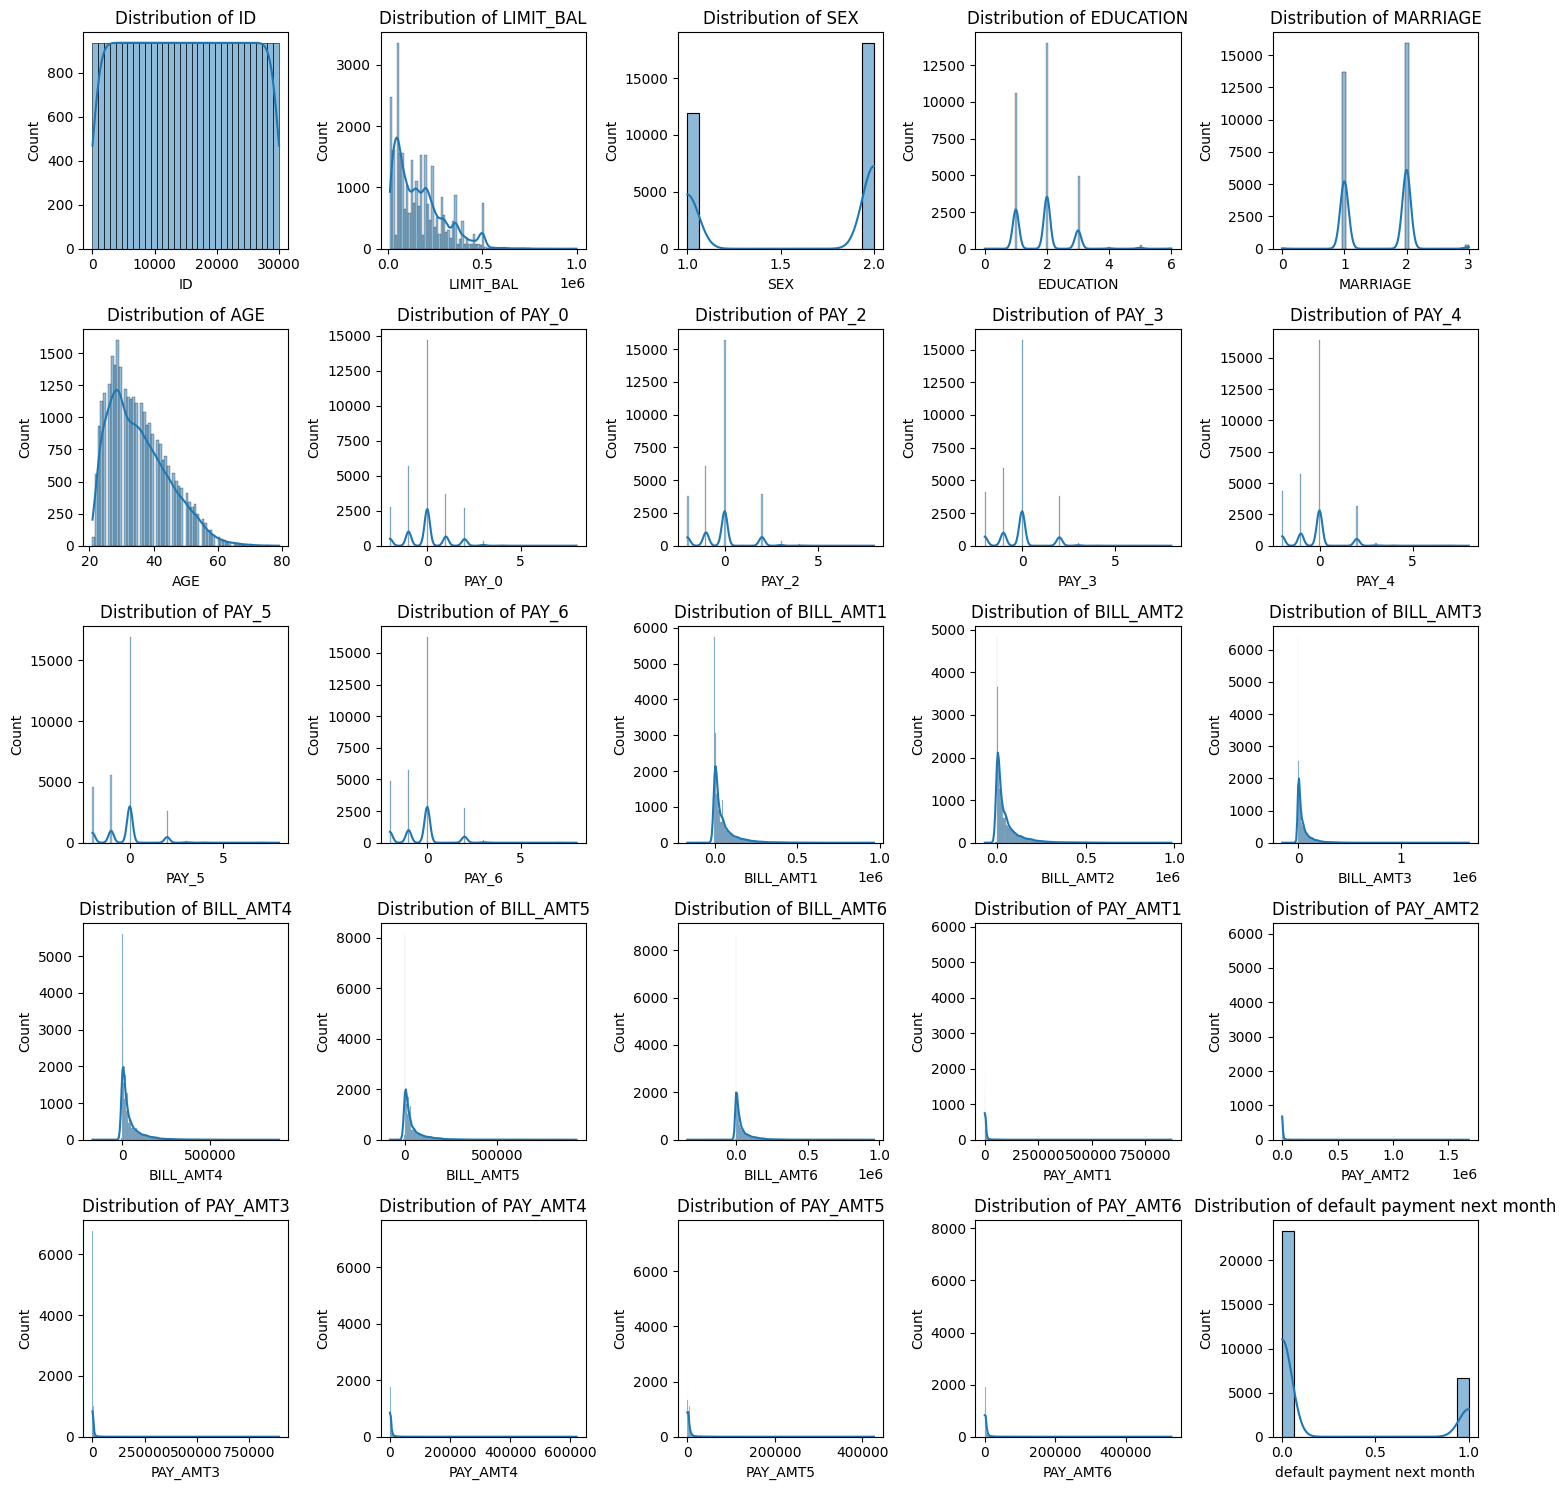

In [ ]:
# Distribution
plt.figure(figsize = (15, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Checking skewness
for col in numerical_cols:
  if df[col].skew() > 0.5 or df[col].skew() < -0.5:
    print(f'{col} is highly skewed')
  else:
    print(f'{col} is not skewed')

ID is not skewed
LIMIT_BAL is highly skewed
SEX is not skewed
EDUCATION is highly skewed
MARRIAGE is not skewed
AGE is highly skewed
PAY_0 is highly skewed
PAY_2 is highly skewed
PAY_3 is highly skewed
PAY_4 is highly skewed
PAY_5 is highly skewed
PAY_6 is highly skewed
BILL_AMT1 is highly skewed
BILL_AMT2 is highly skewed
BILL_AMT3 is highly skewed
BILL_AMT4 is highly skewed
BILL_AMT5 is highly skewed
BILL_AMT6 is highly skewed
PAY_AMT1 is highly skewed
PAY_AMT2 is highly skewed
PAY_AMT3 is highly skewed
PAY_AMT4 is highly skewed
PAY_AMT5 is highly skewed
PAY_AMT6 is highly skewed
default payment next month is highly skewed


We will handle the skewness later

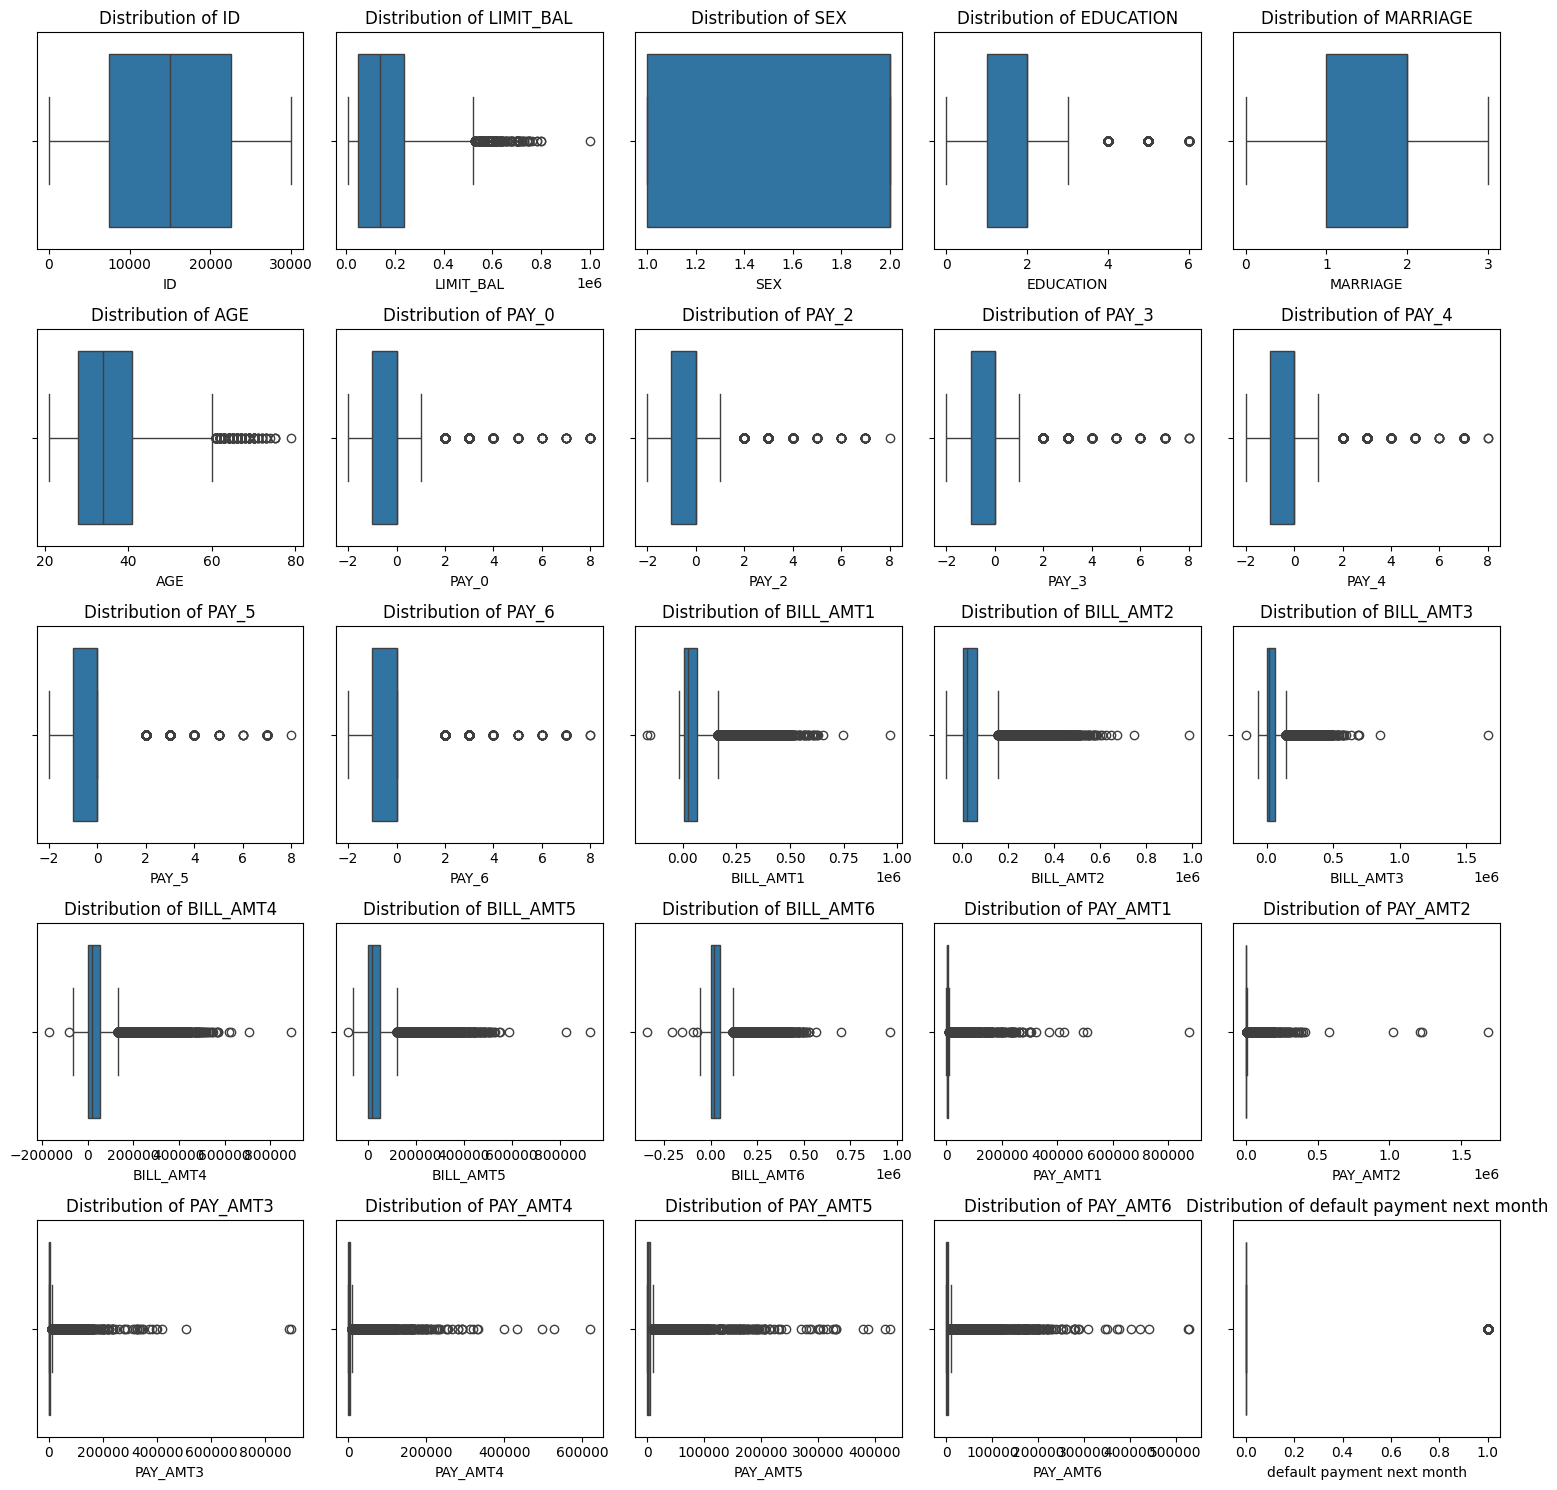

In [ ]:
# Box plot

plt.figure(figsize = (15, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x = df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Multiple outliers are observed here

### Multi-variate Analysis

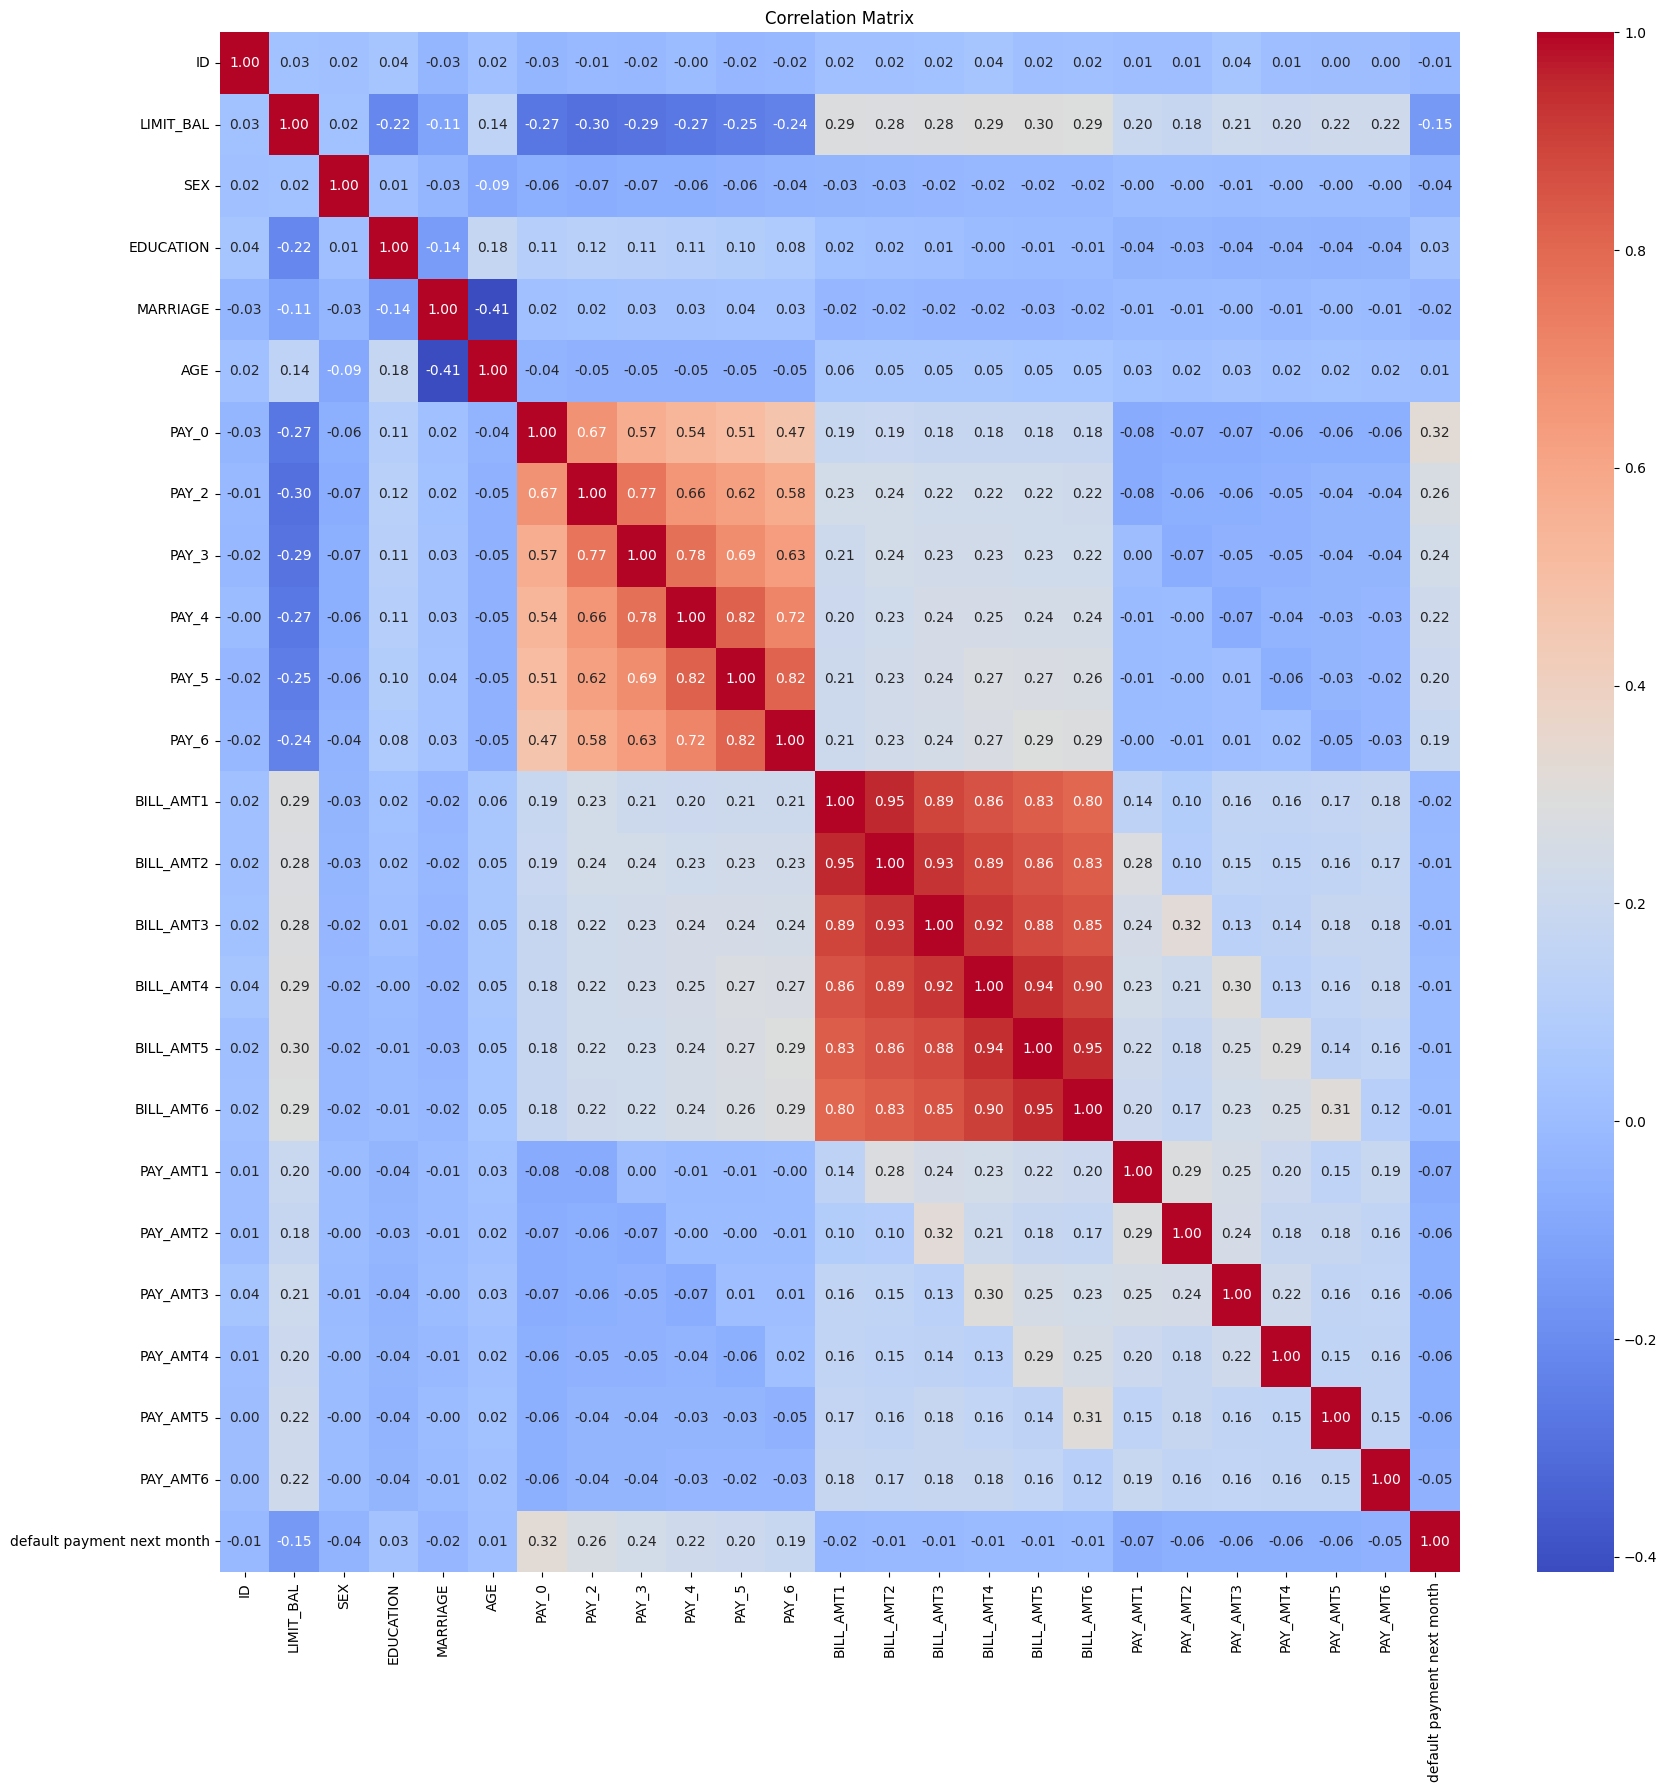

In [ ]:
# Correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Analysis with target variable

In [ ]:
target_col = 'default payment next month'

In [ ]:
# Correlation
target_corr = df.corr()[target_col].sort_values(ascending=False)
target_corr

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

We can drop features here

Text(0.5, 1.0, 'Class Distribution')

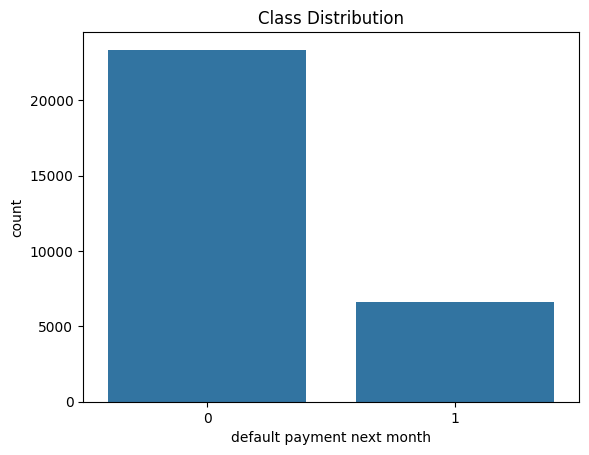

In [ ]:
# Checking class
sns.countplot(x=df[target_col])
plt.title('Class Distribution')

The target distribution is highly distributed. We will try class balancing in the models

## Preprocessing


In [ ]:
# Seperating features and target
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# Splitting to train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We will apply power transformation(for skewness), quantile clipping(for outliers), scaling

Handling outliers

In [ ]:
# Handling outliers using clipping
for col in X_train.columns:
    low = X_train[col].quantile(0.01)
    high = X_train[col].quantile(0.99)

    X_train[col] = X_train[col].clip(low, high)
    X_test[col]  = X_test[col].clip(low, high)

Pipeline

In [ ]:
# Preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# pipeline
num_pipe = Pipeline([
    ("power_transform", PowerTransformer(method='yeo-johnson')),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num_pipe", num_pipe, numerical_features)
])

## Modeling

In [ ]:
# Modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Base models
models = {
    "SVC(Linear)" : SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Logistic Regression" : LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree" : DecisionTreeClassifier(class_weight='balanced', random_state = 42)
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models.items():

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Fitting the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print("-" * 50)



Model: SVC(Linear)
Confusion Matrix:
[[3817  856]
 [ 582  745]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4673
           1       0.47      0.56      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000

ROC AUC Score: 0.6891183797121497
--------------------------------------------------
Model: Logistic Regression
Confusion Matrix:
[[3386 1287]
 [ 486  841]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4673
           1       0.40      0.63      0.49      1327

    accuracy                           0.70      6000
   macro avg       0.63      0.68      0.64      6000
weighted avg       0.77      0.70      0.72      6000

ROC AUC Score: 0.679174210390431
----------------------------------------------

We can observe the best model is SVC(Linear) as it has the best roc auc score.

## Hyperparameter Tuning of the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid to include C and gamma for the rbf kernel
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001]
}

svc_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='linear', class_weight='balanced', random_state=42))
])

grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)

y_pred_tuned = grid.predict(X_test)

# use decision_function for SVC to get scores for ROC AUC
y_scores = grid.decision_function(X_test)

print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_scores)}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'classifier__C': 1, 'classifier__gamma': 1}
Best CV ROC AUC: 0.7634583333333333
[[3817  856]
 [ 582  745]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4673
           1       0.47      0.56      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000

ROC AUC Score: 0.7313691457491779


## Summary

- Implemented **credit card default prediction** using:
  - Support Vector Classifier (SVC – Linear)
  - Logistic Regression
  - Decision Tree Classifier

- Addressed **class imbalance** by setting `class_weight='balanced'` for all models.

- Applied a **preprocessing pipeline** consisting of:
  - Power Transformation
  - Standard Scaling

- **Base Model Performance (ROC AUC):**
  - SVC (Linear): **~0.689**
  - Logistic Regression: ~0.679
  - Decision Tree: ~0.610  
  → SVC (Linear) performed best among the base models.

- Performed **hyperparameter tuning** on SVC (Linear) using `GridSearchCV`:
  - Best parameters: `C = 1`, `gamma = 1`

- **Post-tuning Performance:**
  - SVC (Linear) ROC AUC improved to **~0.731**


## Conclusion:
  - The **SVC (Linear)** model, particularly after tuning, proved to be the **most robust classifier**, showing superior ability to distinguish between defaulting and non-defaulting clients.